In [1]:
from datetime import datetime
import pandas as pd
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import matplotlib.pyplot as plt
import seaborn as sns

# Choose your destiny: 'mainnet' or 'testnet'
network = 'mainnet'  # or 'testnet'
endpoints = {
    'mainnet': 'https://api.poktscan.com/poktscan/api/graphql',
    'testnet': 'https://api.testnet.poktscan.com/poktscan/api/graphql'
}

api_key = str(open("../../POKT Scan.txt", "r").read())

# Set up the headers with the provided API key and content type
headers = {
    "Authorization": api_key,
    "Content-Type": "application/json"
}

# Set up the transport with the chosen GraphQL endpoint and your headers
transport = RequestsHTTPTransport(
    url=endpoints[network],
    headers=headers,
    use_json=True
)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)

# Define your query here
query = gql("""
query {
  GetTopAccountsByBalance(
    input: {
      top: 1000
    }
  ) {
    point
    balance
    percentage
  }
}
""")

query = gql("""
query {
  ListSummaryBetweenDates(
    input: {
      start_date: "2023-01-01",
      end_date: "2023-11-01",
      unit_time: day
    }
  ) {
    points {
        point,
        apps_staked,
        total_relays,
        total_minted,
        total_servicer_rewards,
        total_base_servicer_rewards,
        total_relays
    }
  }
}
""")

try:   
    # Execute the query and get the results
    response = client.execute(query)

    # Convert the result to a pandas DataFrame
    df = pd.DataFrame(response['ListSummaryBetweenDates']['points'])

    # Generate a timestamp and integrate it into the filename
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    #filename = f"top_accounts_{current_time}.csv"

    # Save the DataFrame to a CSV
    #df.to_csv(filename, index=False)
    
except Exception as e:
    print(f"An error occurred: {e}")

## Session EDA

"A Session lasts for 4 blocks, for a total of one hour. Every Application will only have one single Session per relay chain it is staked for. Meaning, following an Application stake event, there will always be a corresponding Session for the Application for each relay chain until it unstakes." from https://docs.pokt.network/learn/glossary/#:~:text=A%20Session%20lasts%20for%204,relay%20chain%20until%20it%20unstakes

Average relays per day:

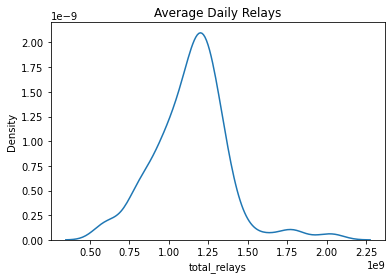

In [2]:
sns.kdeplot(df['total_relays'])
plt.title("Average Daily Relays")
plt.show()